<a href="https://colab.research.google.com/github/ErickMM98/kaggle-housesprice-colab/blob/main/Kaggle_HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Competition - House Prices - Advanced Regression Techniques

- Tenemos > 70 variables explicativas. 
- **Objetivo:** Dar el precio de la casa en cuestión.

[Link a Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)



## Importamos los datos desde Kaggle por la API

In [158]:
!mkdir ~/.kaggle
#GUARDAR .json EN ALGUNA CARPETA DE DRIVE
!cp /content/drive/MyDrive/TestFolder/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 81.7MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 30.1MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 10.2MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 62.5MB/s]


## Análisis estadístico y algunas modificaciones de los datos.

In [159]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import itertools

plt.style.use('ggplot')
mpl.rcParams['text.usetex'] = 0
mpl.rcParams['xtick.labelsize'] = 10 


"""
----- GLOBAL VARIABLES
"""

str_path_test = "/content/test.csv"
str_path_train = "/content/train.csv"

In [160]:
df_test = pd.read_csv(str_path_test)
df_data = pd.read_csv(str_path_train)

columns = df_data.columns
array_bool_object = (df_data.dtypes == object)
array_bool_float = (df_data.dtypes == float)
array_bool_int = (df_data.dtypes == int)

#df_data[columns[array_bool_int]]

### Datos faltantes y eliminación de variables.

Text(0.5, 1.0, 'Conteo de datos verdaderos sobre las variables.')

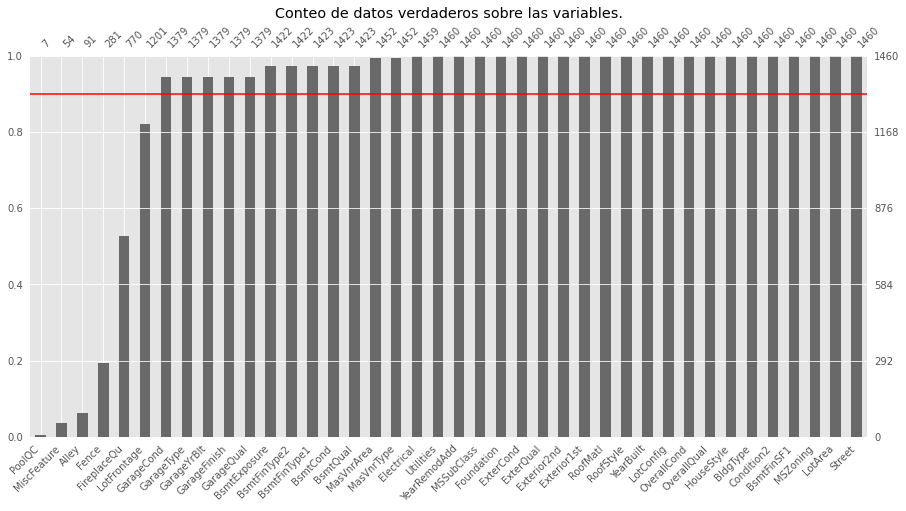

In [9]:
null_var = list(df_data.isna().sum().sort_values(ascending=False).index)[0:40]
#plt.plot(df_test.isna().sum().sort_values(ascending=False))
#df_test.isna().sum().sort_values(ascending=False).head(40)
df_faltantes = df_data[null_var]
#df_train['SalePrice']
fig, ax = plt.subplots()
fig.set_size_inches([15,7])
msno.bar(df_faltantes , ax = ax,fontsize=10)
xleft, xright = ax.set_xlim()
ax.hlines(y=0.90, xmin=xleft,
          xmax = xright, color = 'r')
ax.set_title('Conteo de datos verdaderos sobre las variables.')

Aparentemente, tenemos muchos datos faltantes en *PoolQC, MscFeature, Alley, Fence, FireplaceQu*. Con base en *data_description.txt*, estos hacen referencia a que **NO** son errores, sino que tienen asociado una ausencia justificada. 

Text(0, 0.5, 'Probabilidad de datos faltantes.')

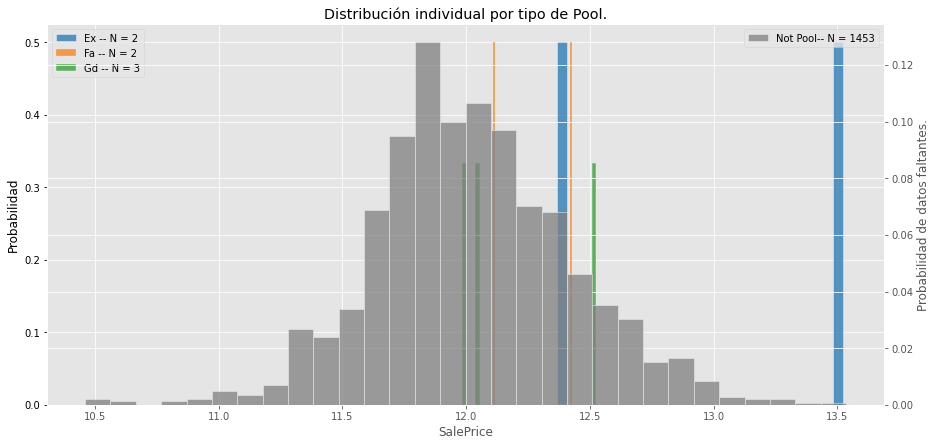

In [10]:
#@title Sobre PoolQC
fig, ax = plt.subplots()
ax2 = ax.twinx()
fig.set_size_inches([15,7])
#list_ax = list(ax[0]) + list(ax[1])
df_foo = df_data.copy()
df_foo['SalePrice'] = np.log(df_foo['SalePrice'])
df_foo['PoolQC'] = df_foo['PoolQC'].fillna('NAN')
color_set = ['gray'] + [plt.cm.tab10(i) for i in range(10)]
dict_count = df_foo['PoolQC'].value_counts().to_dict()
for i,tipopool in enumerate(df_foo['PoolQC'].unique()):
  #axe = list_ax[i]
  if i > 0:
    df_aux = df_foo[df_foo['PoolQC'] == tipopool]
    histplot = sns.histplot(data=df_aux, x="SalePrice",bins=30, ax= ax, stat='probability',
                color = color_set[i])
    histplot.legend(['Ex -- N = {}'.format(dict_count['Ex']),
                     'Fa -- N = {}'.format(dict_count['Fa']),
                     'Gd -- N = {}'.format(dict_count['Gd'])],
                    loc = 'upper left')
  else:
    df_aux = df_foo[df_foo['PoolQC'] == tipopool]
    grayhistplot = sns.histplot(data=df_aux, x="SalePrice",bins=30, ax= ax2, stat='probability',
                color = color_set[i] )
    grayhistplot.legend(['Not Pool-- N = {}'.format(dict_count['NAN'])],loc = 'upper right')

ax.set_title("Distribución individual por tipo de Pool.")
ax.set_ylabel("Probabilidad", color = 'Black')
ax.tick_params(axis='y', colors='Black')
ax2.set_ylabel("Probabilidad de datos faltantes.")

Text(0, 0.5, 'Probabilidad de datos faltantes.')

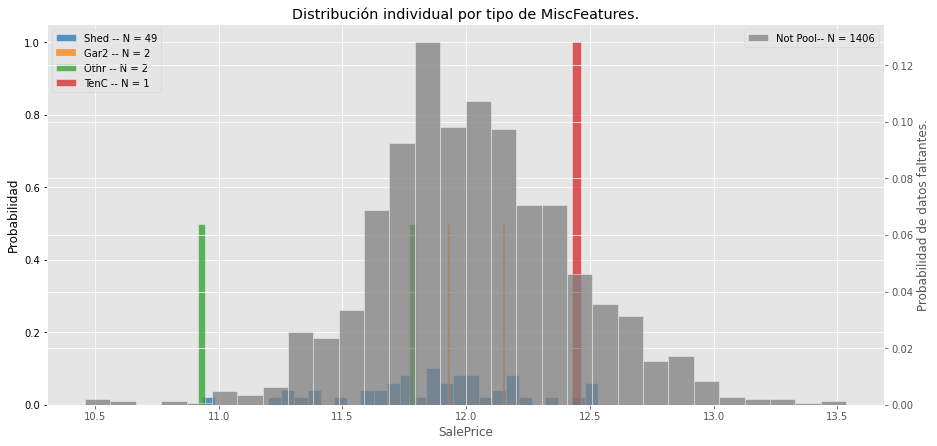

In [ ]:
#@title Sobre MscFeature
fig, ax = plt.subplots()
ax2 = ax.twinx()
fig.set_size_inches([15,7])
#list_ax = list(ax[0]) + list(ax[1])
df_foo = df_data.copy()
df_foo['SalePrice'] = np.log(df_foo['SalePrice'])
df_foo['MiscFeature'] = df_foo['MiscFeature'].fillna('NAN')
color_set = ['gray'] + [plt.cm.tab10(i) for i in range(10)]
dict_count = df_foo['MiscFeature'].value_counts().to_dict()
for i,tipopool in enumerate(df_foo['MiscFeature'].unique()):
  if i > 0:
    df_aux = df_foo[df_foo['MiscFeature'] == tipopool]
    histplot = sns.histplot(data=df_aux, x="SalePrice",bins=30, ax= ax, stat='probability',
                color = color_set[i])
    histplot.legend(['Shed -- N = {}'.format(dict_count['Shed']),
                     'Gar2 -- N = {}'.format(dict_count['Gar2']),
                     'Othr -- N = {}'.format(dict_count['Othr']),
                     'TenC -- N = {}'.format(dict_count['TenC'])],
                    loc = 'upper left')
  else:
    df_aux = df_foo[df_foo['MiscFeature'] == tipopool]
    grayhistplot = sns.histplot(data=df_aux, x="SalePrice",bins=30, ax= ax2, stat='probability',
                color = color_set[i] )
    grayhistplot.legend(['Not Pool-- N = {}'.format(dict_count['NAN'])],loc = 'upper right')

ax.set_title("Distribución individual por tipo de MiscFeatures.")
ax.set_ylabel("Probabilidad", color = 'Black')
ax.tick_params(axis='y', colors='Black')
ax2.set_ylabel("Probabilidad de datos faltantes.")

Text(0, 0.5, 'Probabilidad de datos faltantes.')

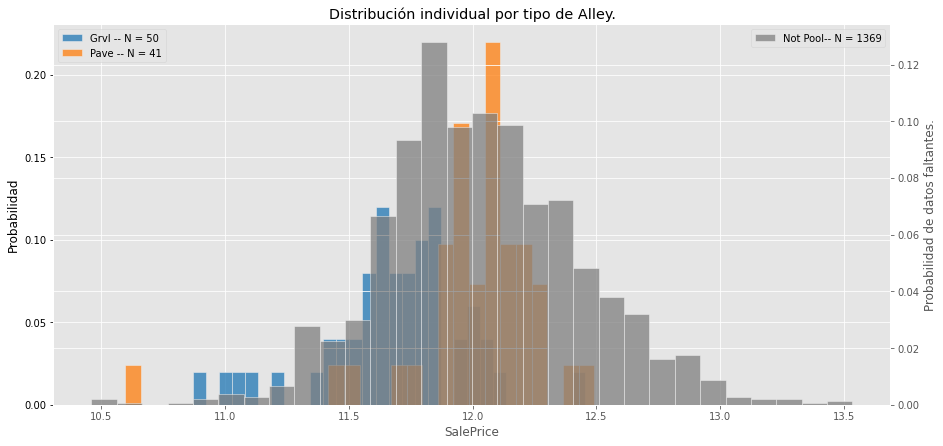

In [ ]:
#@title Sobre Alley
column_int = 'Alley'
fig, ax = plt.subplots()
ax2 = ax.twinx()
fig.set_size_inches([15,7])
#list_ax = list(ax[0]) + list(ax[1])
df_foo = df_data.copy()
df_foo['SalePrice'] = np.log(df_foo['SalePrice'])
df_foo[column_int] = df_foo[column_int].fillna('NAN')
color_set = ['gray'] + [plt.cm.tab10(i) for i in range(10)]
dict_count = df_foo[column_int].value_counts().to_dict()
for i,tipopool in enumerate(df_foo[column_int].unique()):
  if i > 0:
    df_aux = df_foo[df_foo[column_int] == tipopool]
    histplot = sns.histplot(data=df_aux, x="SalePrice",bins=30, ax= ax, stat='probability',
                color = color_set[i])
  else:
    df_aux = df_foo[df_foo[column_int] == tipopool]
    grayhistplot = sns.histplot(data=df_aux, x="SalePrice",bins=30, ax= ax2, stat='probability',
                color = color_set[i] )
    grayhistplot.legend(['Not Pool-- N = {}'.format(dict_count['NAN'])],loc = 'upper right')

histplot.legend(['{} -- N = {}'.format(tipopool ,dict_count[tipopool]) for i,tipopool in enumerate(df_foo[column_int].unique()) if i > 0 ],
                loc = 'upper left')

ax.set_title("Distribución individual por tipo de {}.".format(column_int))
ax.set_ylabel("Probabilidad", color = 'Black')
ax.tick_params(axis='y', colors='Black')
ax2.set_ylabel("Probabilidad de datos faltantes.")

Text(0, 0.5, 'Probabilidad de datos faltantes.')

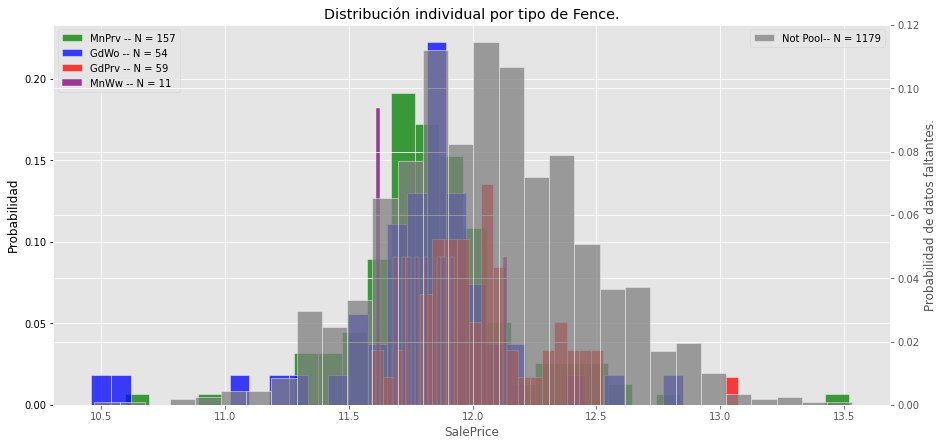

In [ ]:
#@title Sobre Fence
column_int = 'Fence'
fig, ax = plt.subplots()
ax2 = ax.twinx()
fig.set_size_inches([15,7])
#list_ax = list(ax[0]) + list(ax[1])
df_foo = df_data.copy()
df_foo['SalePrice'] = np.log(df_foo['SalePrice'])
df_foo[column_int] = df_foo[column_int].fillna('NAN')
color_set = ['gray'] + [plt.cm.tab10(i) for i in range(10)]
dict_count = df_foo[column_int].value_counts().to_dict()
for i,tipopool in enumerate(df_foo[column_int].unique()):
  if i > 0:
    df_aux = df_foo[df_foo[column_int] == tipopool]
    histplot = sns.histplot(data=df_aux, x="SalePrice",bins=30, ax= ax, stat='probability',
                color = color_set[i])
  else:
    df_aux = df_foo[df_foo[column_int] == tipopool]
    grayhistplot = sns.histplot(data=df_aux, x="SalePrice",bins=30, ax= ax2, stat='probability',
                color = color_set[i] )
    grayhistplot.legend(['Not Pool-- N = {}'.format(dict_count['NAN'])],loc = 'upper right')

histplot.legend(['{} -- N = {}'.format(tipopool ,dict_count[tipopool]) for i,tipopool in enumerate(df_foo[column_int].unique()) if i > 0 ],
                loc = 'upper left')

ax.set_title("Distribución individual por tipo de {}.".format(column_int))
ax.set_ylabel("Probabilidad", color = 'Black')
ax.tick_params(axis='y', colors='Black')
ax2.set_ylabel("Probabilidad de datos faltantes.")

Text(0, 0.5, 'Probabilidad de datos faltantes.')

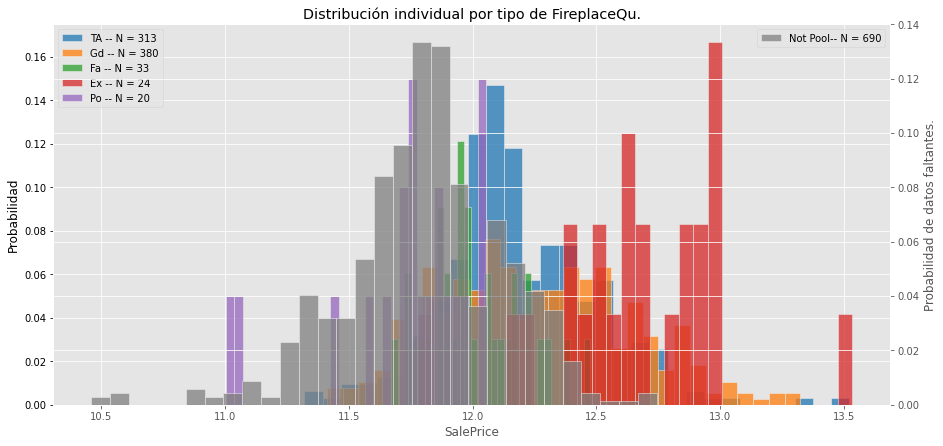

In [ ]:
#@title Sobre FireplaceQu
column_int = 'FireplaceQu'
fig, ax = plt.subplots()
ax2 = ax.twinx()
fig.set_size_inches([15,7])
#list_ax = list(ax[0]) + list(ax[1])
df_foo = df_data.copy()
df_foo['SalePrice'] = np.log(df_foo['SalePrice'])
df_foo[column_int] = df_foo[column_int].fillna('NAN')
#color_set = ['gray','green','blue', 'red', 'purple']
color_set = ['gray'] + [plt.cm.tab10(i) for i in range(10)]
dict_count = df_foo[column_int].value_counts().to_dict()
for i,tipopool in enumerate(df_foo[column_int].unique()):
  if i > 0:
    df_aux = df_foo[df_foo[column_int] == tipopool]
    histplot = sns.histplot(data=df_aux, x="SalePrice",bins=30, ax= ax, stat='probability',
                color = color_set[i])
  else:
    df_aux = df_foo[df_foo[column_int] == tipopool]
    grayhistplot = sns.histplot(data=df_aux, x="SalePrice",bins=30, ax= ax2, stat='probability',
                color = color_set[i] )
    grayhistplot.legend(['Not Pool-- N = {}'.format(dict_count['NAN'])],loc = 'upper right')

histplot.legend(['{} -- N = {}'.format(tipopool ,dict_count[tipopool]) for i,tipopool in enumerate(df_foo[column_int].unique()) if i > 0 ],
                loc = 'upper left')

ax.set_title("Distribución individual por tipo de {}.".format(column_int))
ax.set_ylabel("Probabilidad", color = 'Black')
ax.tick_params(axis='y', colors='Black')
ax2.set_ylabel("Probabilidad de datos faltantes.")

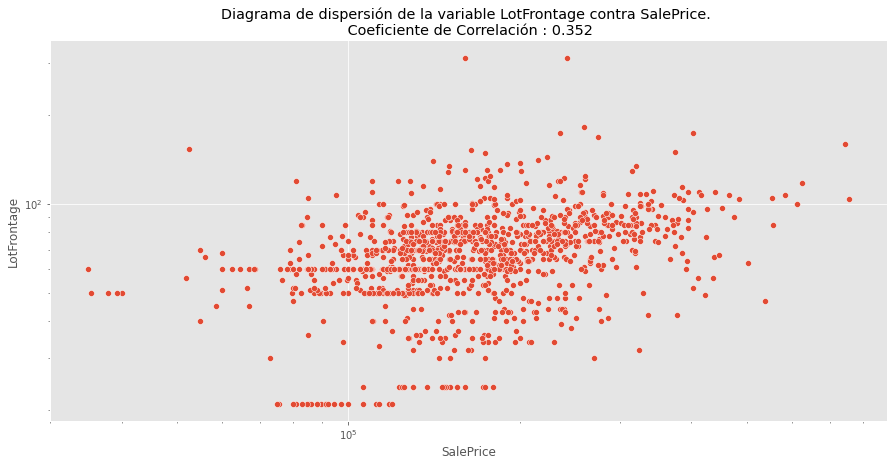

In [ ]:
#@title Sobre LotFrontage
column_int = 'LotFrontage'
fig, ax = plt.subplots()
fig.set_size_inches([15,7])
#list_ax = list(ax[0]) + list(ax[1])
df_foo = df_data.copy()
df_foo = df_foo[~df_foo['LotFrontage'].isna()]
#df_foo['SalePrice'] = np.log(df_foo['SalePrice'])
#df_foo[column_int] = np.log(df_foo[column_int])
corr = df_foo[['SalePrice', column_int]].corr().iloc[0,1]
sns.scatterplot(data=df_foo, x='SalePrice', y = column_int, ax=ax)

ax.set_title("Diagrama de dispersión de la variable {} contra SalePrice. \n Coeficiente de Correlación : {:.3f}".format(column_int, corr))
ax.set_xscale('log')
ax.set_yscale('log')

Por lo gráficos anteriores, descartamos las siguiente variables del *dataframe  train*. 
- ***PoolQC***
- ***MScFeature***
- ***Alley***
- ***Fence***
- ***FireplaceQu***
- ***LotFrontage***

### Sobre la imputación de los datos.

Para este caso, vamos a hacerlo dependediendo de la columna o variable. Esto es, si es categórica, colocamos el más frecuente. Si es contíuna, usamos KNN.

In [162]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
column_eliminate = ["PoolQC",
                    "MiscFeature",
                    "Alley",
                    "Fence",
                    "FireplaceQu",
                    "LotFrontage"]

df_columns_int = df_data.drop(column_eliminate, axis = 1)
#df_columns_int['SalePrice'] = np.log(df_columns_int['SalePrice'])

#Columnas con algunos datos faltantes
list_null_axes = df_columns_int.isna().sum()[df_columns_int.isna().sum() > 0 ].index
dict_type = df_columns_int.dtypes.to_dict()

columns_objets = [column for column in list_null_axes if str(dict_type[column]) != 'float64' or column == 'GarageYrBlt']
columns_float = [column for column in list_null_axes if str(dict_type[column]) == 'float64' and column != 'GarageYrBlt']

df_complete_data = df_columns_int.copy()

#Para las continuas
imputer = KNNImputer(n_neighbors=5)
df_complete_data[columns_float] = imputer.fit_transform(df_complete_data[columns_float])

#Para las otras
imp = SimpleImputer(strategy="most_frequent")
df_complete_data[columns_objets] = imp.fit_transform(df_complete_data[columns_objets])


"""
df_columns_int['MasVnrArea'] = np.log(df_columns_int['MasVnrArea'])

#Columnas con algunos datos faltantes
list_null_axes = df_columns_int.isna().sum()[df_columns_int.isna().sum() > 0 ].index
dict_type = df_columns_int.dtypes.to_dict()

fig, ax = plt.subplots(4,3)
fig.set_size_inches([15,20])
list_ax = list(ax[0]) +  list(ax[1]) + list(ax[2]) + list(ax[3])

i = 0
for column in list_null_axes:
  print( column, '\t',dict_type[column], '\t', df_columns_int.isna().sum()[df_columns_int.isna().sum() > 0 ][column])
  if str(dict_type[column]) != 'float64' or column == 'GarageYrBlt':
    axe = list_ax[i]
    #axe.set_title(column)
    sns.violinplot(y = 'SalePrice', x = column, ax= axe, data=df_columns_int)
    if not i%3:
      axe.set_ylabel('$Log(SalePrice)$')
    else:
      axe.set_ylabel('')

    if column == 'GarageYrBlt':
      ticks = axe.get_xticklabels()
      print(ticks)

    i+=1

for column in list_null_axes:
  print( column, '\t',dict_type[column], '\t', df_columns_int.isna().sum()[df_columns_int.isna().sum() > 0 ][column])
  if str(dict_type[column]) == 'float64':
    fig, ax = plt.subplots()
    sns.scatterplot(y = 'SalePrice', x = column, ax= ax, data=df_columns_int)
    ax.set_ylabel('$Log(SalePrice)$')
    corr = df_columns_int[['SalePrice', column]].corr().iloc[0,1]
    ax.set_title(corr)
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
column_eliminate = ["PoolQC",
                    "MiscFeature",
                    "Alley",
                    "Fence",
                    "FireplaceQu",
                    "LotFrontage"]

df_columns_int = df_data.drop(column_eliminate, axis = 1)
df_columns_int['SalePrice'] = np.log(df_columns_int['SalePrice'])

"""
pass

A partir de este punto, nuestra variable ***df_complete_data***, son nuestros datos completos.

Text(0.5, 1.0, 'Conteo de datos verdaderos sobre las variables.')

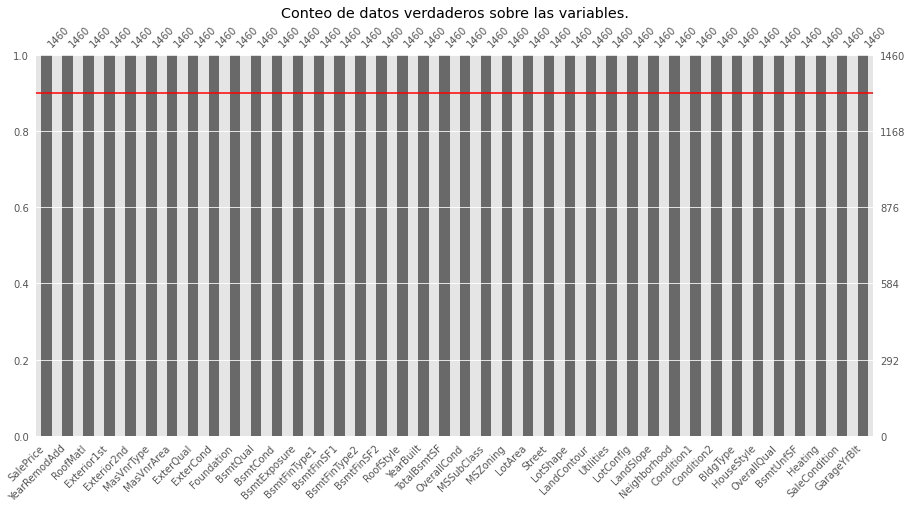

In [163]:
null_var = list(df_complete_data.isna().sum().sort_values(ascending=False).index)[0:40]
#plt.plot(df_test.isna().sum().sort_values(ascending=False))
#df_test.isna().sum().sort_values(ascending=False).head(40)
df_faltantes = df_complete_data[null_var]
#df_train['SalePrice']
fig, ax = plt.subplots()
fig.set_size_inches([15,7])
msno.bar(df_faltantes , ax = ax,fontsize=10)
xleft, xright = ax.set_xlim()
ax.hlines(y=0.90, xmin=xleft,
          xmax = xright, color = 'r')
ax.set_title('Conteo de datos verdaderos sobre las variables.')

In [ ]:
df_complete_data.shape

(1460, 75)

Como podemos ver del gráfico anterior, ya no tenemos datos faltantes. c: 

Finalmente, nuestra tabla resultante tiene una muestra de $n = 1460$ registros con $m=75$ variables.

### Analicemos nuestra variable objetivo: *SalePrice*

Para mejorar nuestra estimación, tranformemos nuestra variable objetivo a una escala de $log10$. 

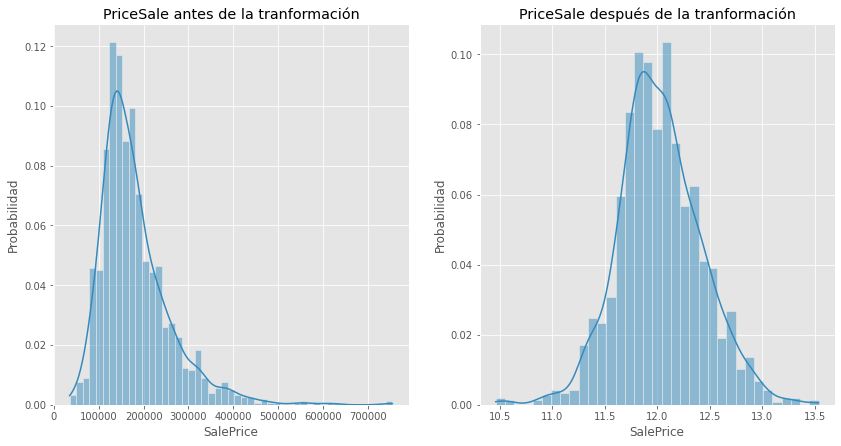

In [164]:
df_plot = df_complete_data.copy()
fig, ax = plt.subplots(1,2)
fig.set_size_inches([14,7])
ax[0].set_title("PriceSale antes de la tranformación")
sns.histplot(x = 'SalePrice', data = df_plot, kde = True, ax= ax[0], stat='probability')
ax[0].set_ylabel('Probabilidad')

ax[1].set_title("PriceSale después de la tranformación")
df_plot['SalePrice'] = np.log(df_plot['SalePrice'])
sns.histplot(x = 'SalePrice', data = df_plot, kde = True,ax= ax[1], stat='probability')
ax[1].set_ylabel('Probabilidad')
plt.show()

### Veamos su correlación con las otras variables.

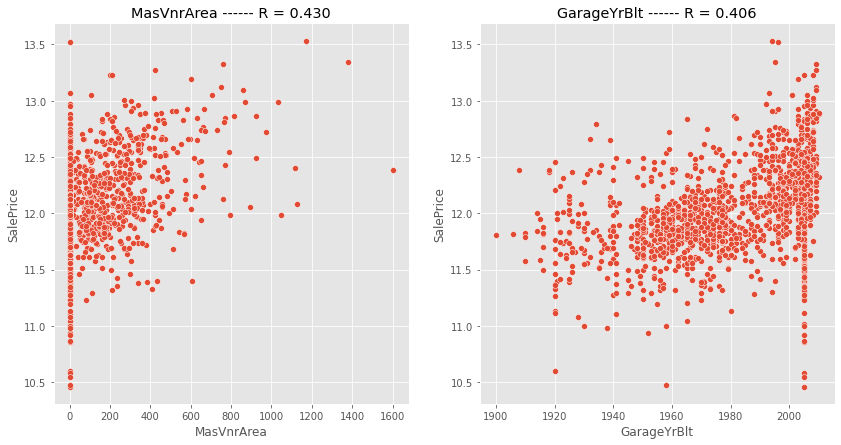

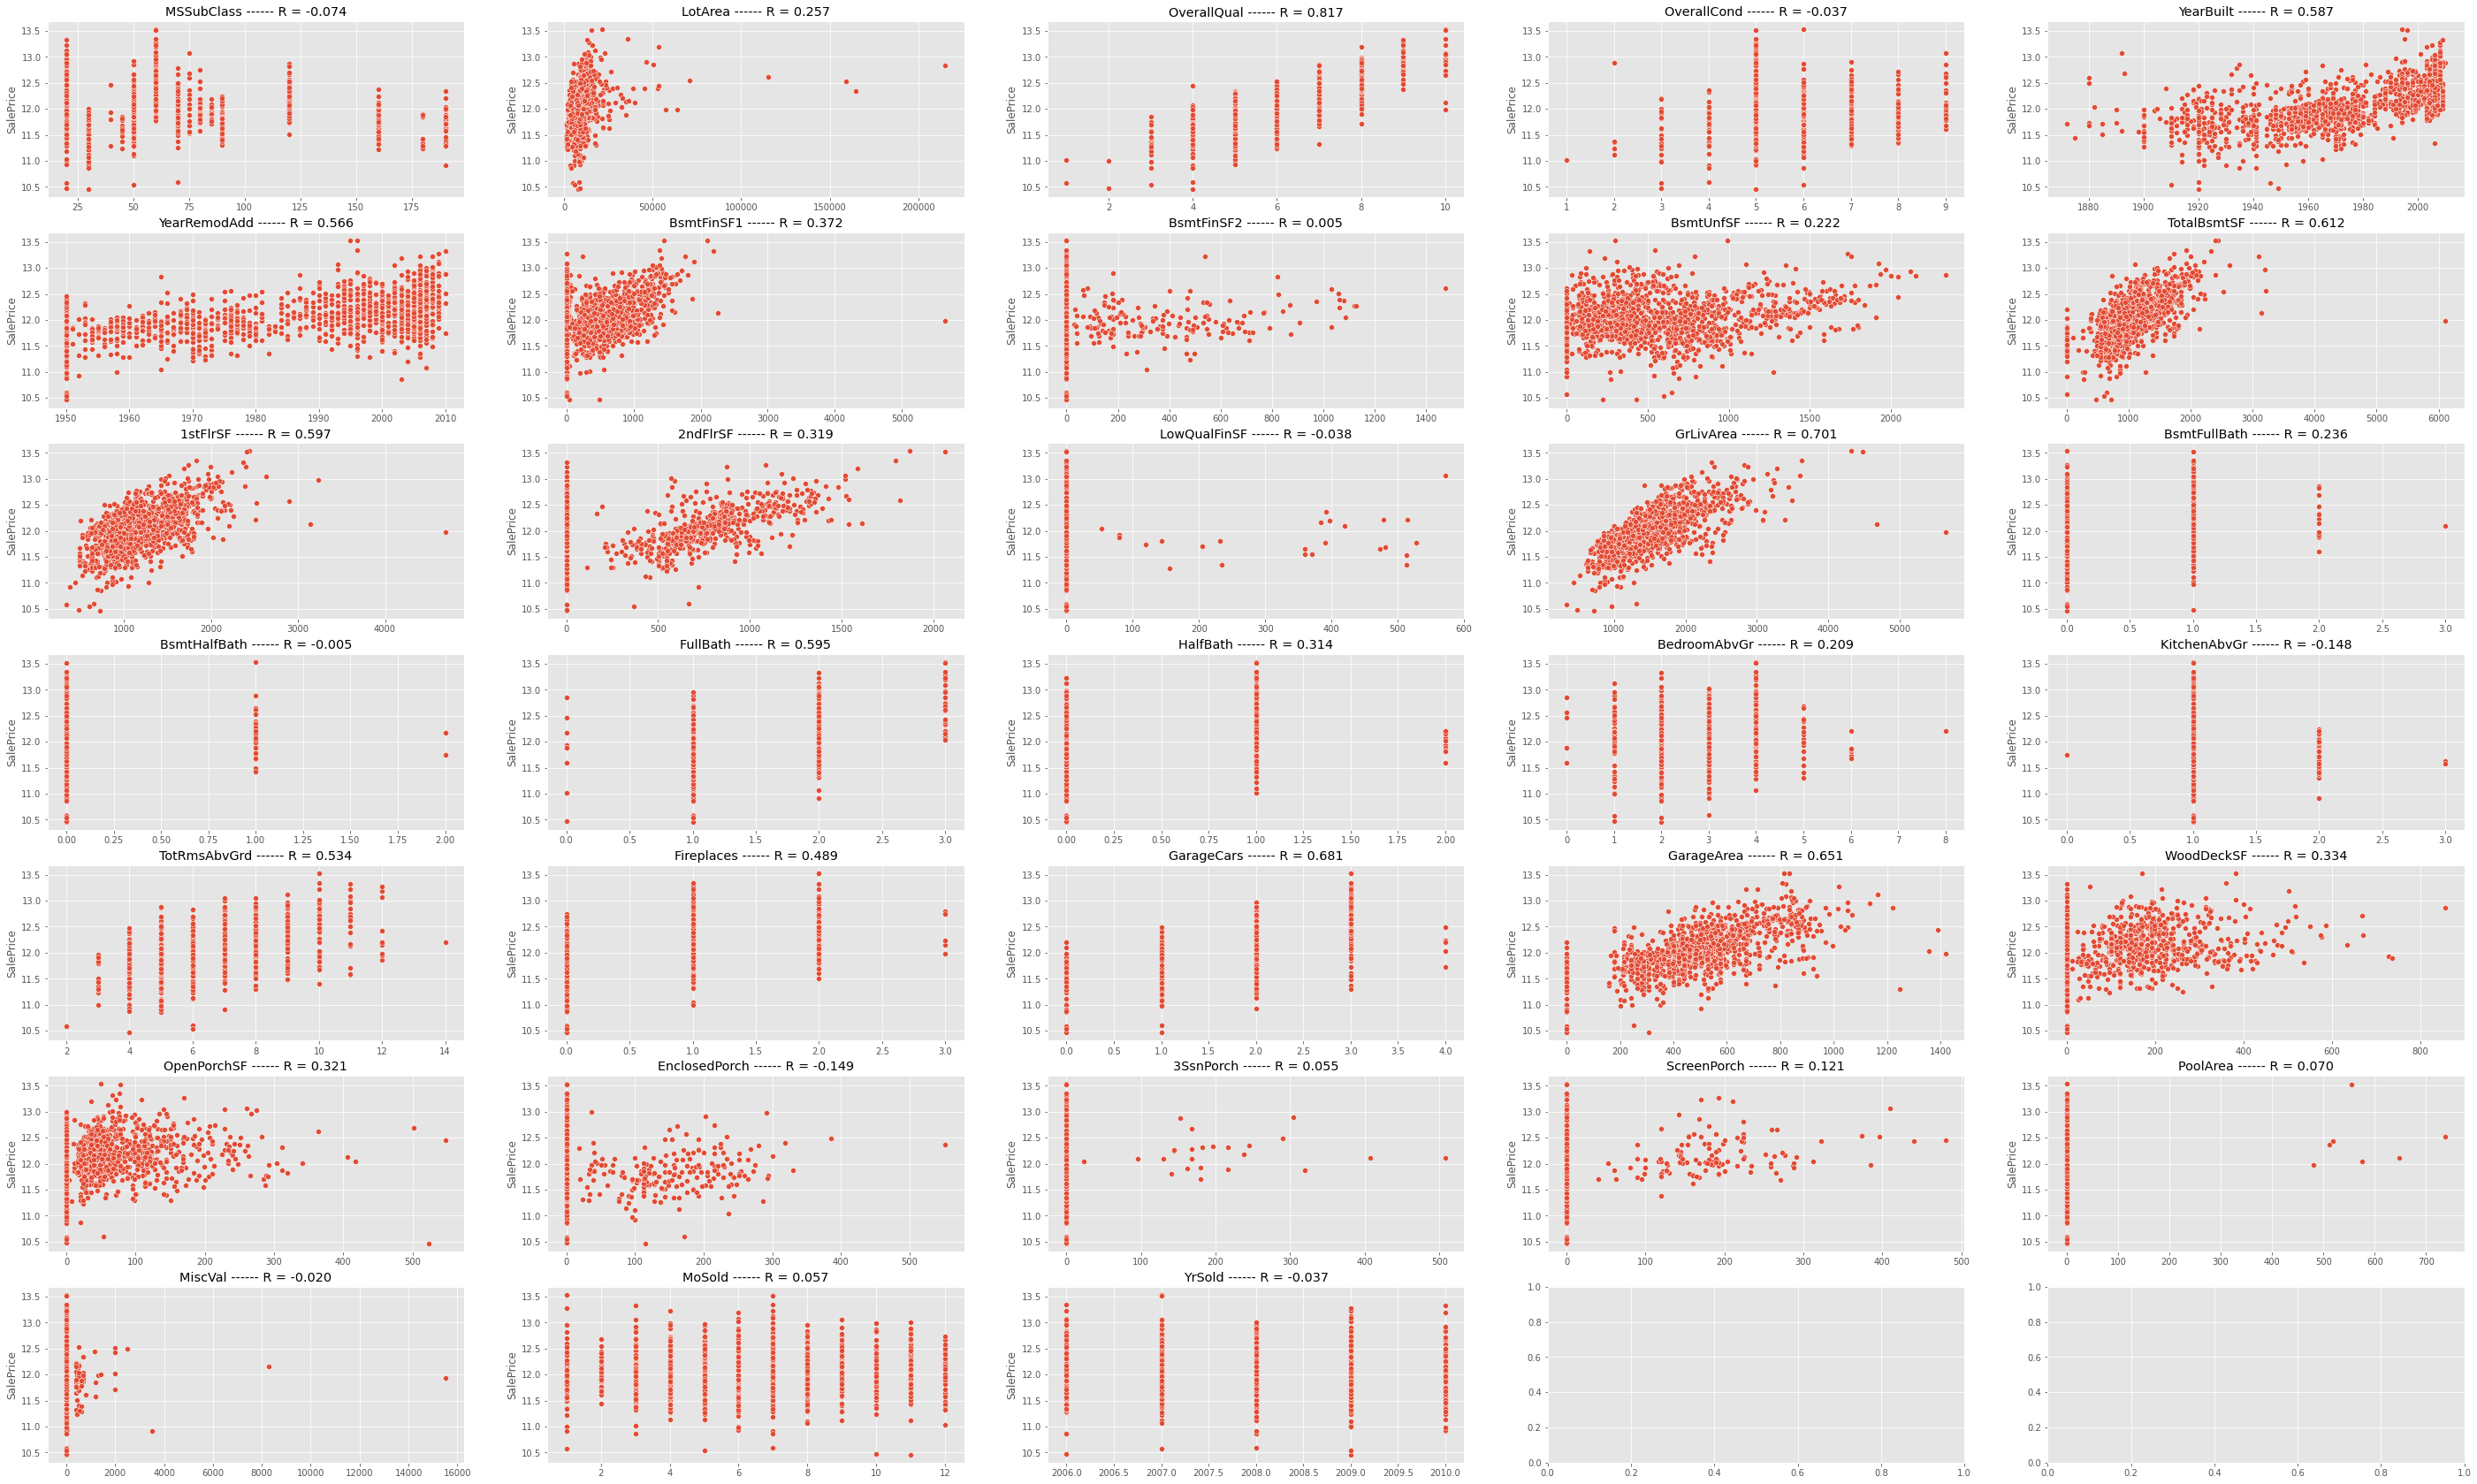

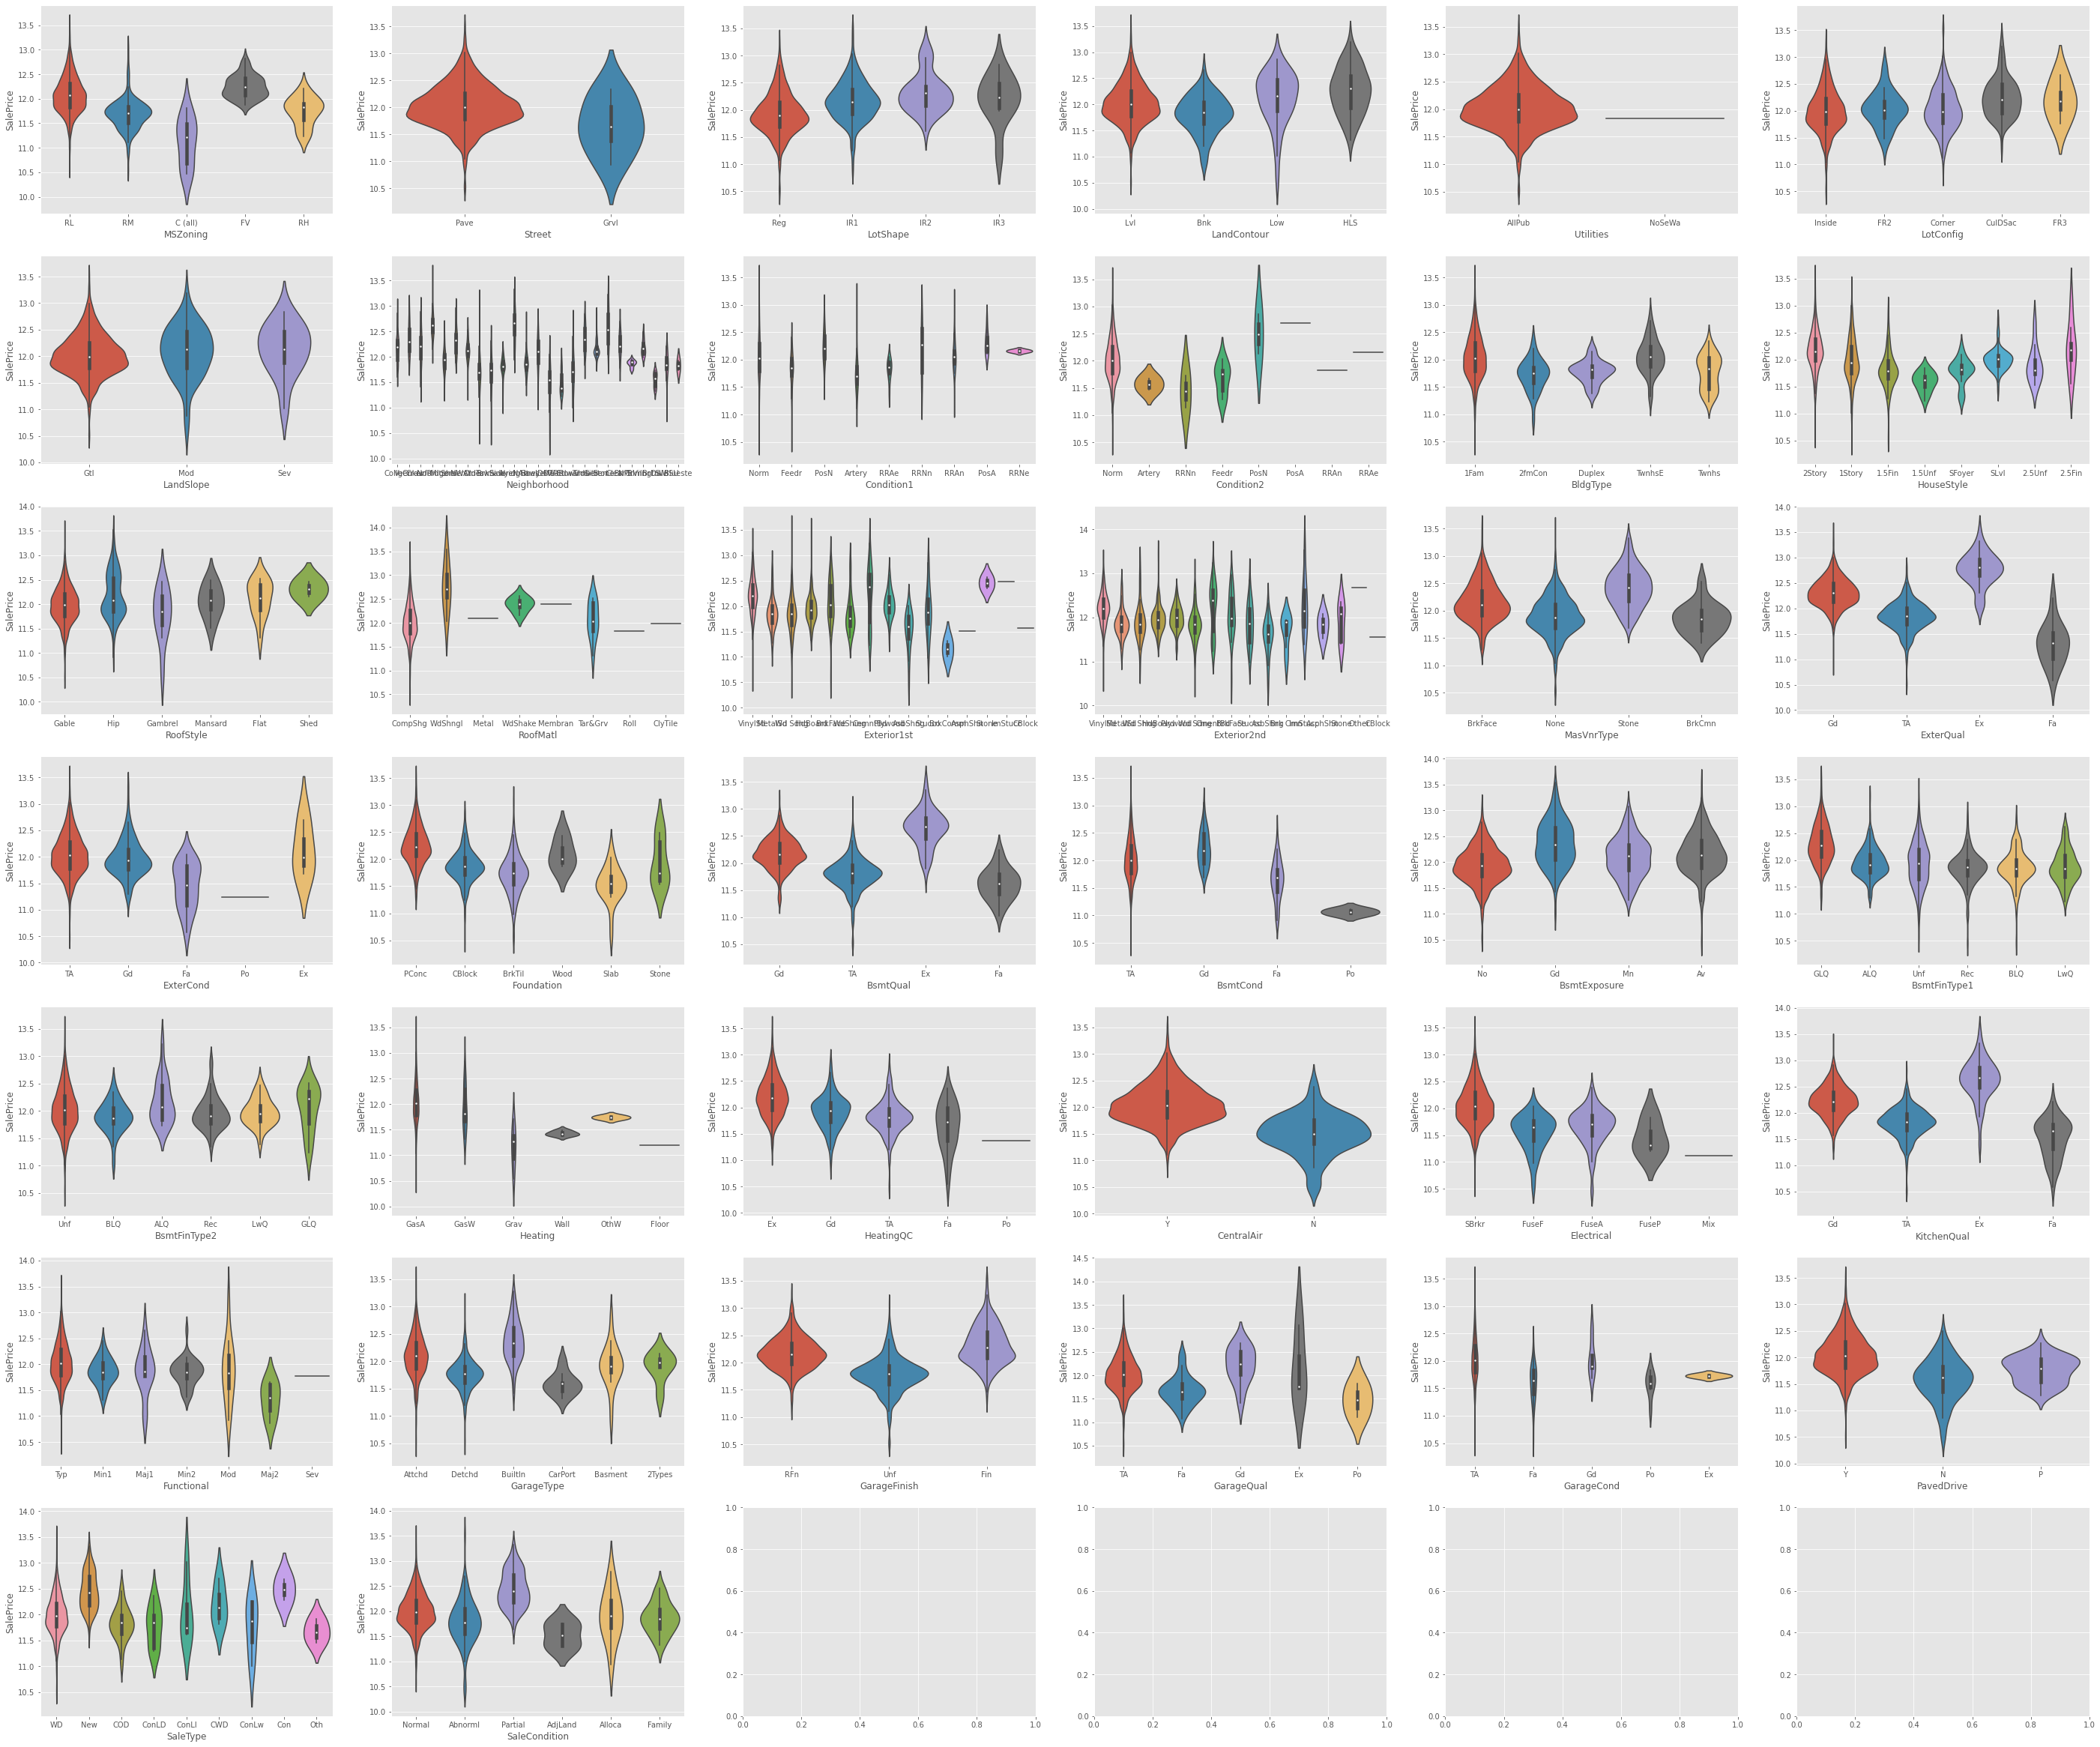

In [23]:
df_train = df_complete_data.copy()
df_train['SalePrice'] = np.log(df_train['SalePrice'])
#df_train['LotArea'] = np.log(df_train['LotArea'])
#df_train['LotArea'] = np.log(df_train['LotArea'])


#df_train.dtypes.value_counts()


fig_float, ax_float = plt.subplots(1,2)
fig_float.set_size_inches([14,7])
fig_int, ax_int = plt.subplots(7,5)
fig_int.set_size_inches([49,30])
fig_object, ax_object = plt.subplots(7,6)
fig_object.set_size_inches([49,42])


list_ax_float = list(ax_float)
list_ax_int = list(ax_int[0]) +  list(ax_int[1]) + list(ax_int[2]) + list(ax_int[3]) + list(ax_int[4]) + list(ax_int[5]) + list(ax_int[6])
list_ax_object = list(ax_object[0]) +  list(ax_object[1]) + list(ax_object[2]) + list(ax_object[3]) + list(ax_object[4]) + list(ax_object[5]) + list(ax_object[6])

i_float = 0
i_int = 0
i_object = 0

dict_columns = df_train.dtypes.to_dict()

for column in df_train.columns:
  if column != 'Id' and column != 'SalePrice':
    type_str = str(dict_columns[column])
    if type_str == 'int64' or column == 'LotArea':
      sns.scatterplot(x = column , y = 'SalePrice', ax= list_ax_int[i_int], data=df_train)
      df_corr_foo = df_train[['SalePrice', column]]
      #df_corr_foo[column] = np.log(df_corr_foo[column])
      corr = df_corr_foo.corr().iloc[0,1]
      list_ax_int[i_int].set_title("{} ------ R = {:.3f}".format(column,corr))
      list_ax_int[i_int].set_xlabel('')
      #sns.scatterplot(x = column , y = 'SalePrice', ax= list_ax_int[i_int], data=df_corr_foo)
      #list_ax_int[i_int].set_xscale('log')
      i_int += 1
    elif type_str == 'object':
      sns.violinplot(x = column, y = 'SalePrice', ax= list_ax_object[i_object], data=df_train)
      i_object += 1
    else:
      corr = df_corr_foo.corr().iloc[0,1]
      sns.scatterplot(x = column, y = 'SalePrice', ax= list_ax_float[i_float], data=df_train)
      corr = df_train[['SalePrice', column]].corr().iloc[0,1]
      list_ax_float[i_float].set_title("{} ------ R = {:.3f}".format(column,corr))
      list_ax_int[i_float].set_xlabel('')
      i_float += 1
  i+=1

Algunas variables si bien son cualitativas, se tiene que deben tener cierto orden. El ejemplo más directo es ***HeatingQC***. 
Para ello, pasemos los valores a enteros poderándolos de mayor a mayor en calidad o condición.



In [186]:
#@title La nueva ponderación de las variables cualitativas.
df_train = df_complete_data.copy()
columns_ponderar = ['ExterQual',
                    'ExterCond',
                    'BsmtQual',
                    'BsmtCond',
                    'BsmtExposure',
                    'BsmtFinType1',
                    'BsmtFinType2',
                    'HeatingQC',
                    'KitchenQual',
                    'GarageFinish',
                    'GarageQual',
                    'GarageCond']

dict_qual = {"Ex":5,
       "Gd":4,
       "TA":3,
       "Fa":2,
       "Po":1,
       "NA":0} 

dict_fin = {"Fin":4,
       "RFn":2,
       "Unf":	1,
       "NA":0} 

dict_exp = {"Gd":4,
       "Av":	3,	
       "Mn" :2,
       "No":	1,
       "NA": 0}

dict_qualtype = {"GLQ":	6,
       "ALQ":5,
       "BLQ":4,
       "Rec":3,
       "LwQ":2,
       "Unf":	1,
       "NA":0}


df_train['ExterQual'] = df_train['ExterQual'].replace(dict_qual)
df_train['ExterCond'] = df_train['ExterCond'].replace(dict_qual)
df_train['BsmtQual'] = df_train['BsmtQual'].replace(dict_qual)
df_train['BsmtCond'] = df_train['BsmtCond'].replace(dict_qual)
df_train['BsmtExposure'] = df_train['BsmtExposure'].replace(dict_exp)
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].replace(dict_qualtype)
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].replace(dict_qualtype)
df_train['HeatingQC'] = df_train['HeatingQC'].replace(dict_qual)
df_train['KitchenQual'] = df_train['KitchenQual'].replace(dict_qual)
df_train['GarageFinish'] = df_train['GarageFinish'].replace(dict_fin)
df_train['GarageQual'] = df_train['GarageQual'].replace(dict_qual)
df_train['GarageCond'] = df_train['GarageCond'].replace(dict_qual)

Veamos las coorelaciones que se tienen con la variable "SalePrice".


In [187]:
df_corr_foo = df_train.select_dtypes([np.number]).copy()
df_corr_foo['SalePrice'] = np.log(df_corr_foo['SalePrice'])
#df_corr_foo['TotalBsmtSF'] = np.log(df_corr_foo['TotalBsmtSF'])
df_corr_foo['1stFlrSF'] = np.log(df_corr_foo['1stFlrSF'])
#df_corr_foo['MasVnrArea'] = np.log(df_corr_foo['MasVnrArea'])
#df_corr_foo['BsmtFinSF1'] = np.log(df_corr_foo['BsmtFinSF1'])
#df_corr_foo['WoodDeckSF'] = np.log(df_corr_foo['WoodDeckSF'])
#df_corr_foo['2ndFlrSF'] = np.log(df_corr_foo['2ndFlrSF'])
#df_corr_foo['OpenPorchSF'] = np.log(df_corr_foo['OpenPorchSF'])
df_corr_foo['LotArea'] = np.log(df_corr_foo['LotArea'])
df_corr_foo['GrLivArea'] = np.log(df_corr_foo['GrLivArea'])
#df_corr_foo['MiscVal'] = np.log(df_corr_foo['MiscVal'])
#df_corr_foo['PoolArea'] = np.log(df_corr_foo['PoolArea'])
dict_corrabs = df_corr_foo.corr()['SalePrice'].sort_values(ascending = False).to_dict()
array_corrabs = df_corr_foo.corr()['SalePrice'].abs().sort_values(ascending = False)
#print(dict_corrabs)
for column in dict_corrabs:
  if column != 'SalePrice':
    #plt.title('{} - {:.5f}'.format(column, dict_corrabs[column]))
    #sns.scatterplot( x = column , y = 'SalePrice', data= df_corr_foo)
    #plt.show()
    pass

columns_not_corr = array_corrabs[(array_corrabs < 0.05) & (array_corrabs.index != 'Id')].index

columns_not_corr

#Para prueba 
df_train = df_train.drop(columns_not_corr, axis= True)
#df_train['SalePrice'] = np.log(df_train['SalePrice'])
df_train['1stFlrSF'] = np.log(df_train['1stFlrSF'])
df_train['LotArea'] = np.log(df_train['LotArea'])
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

# Primer modelo: Regresión lineal.

Primero, hagamos nuestras variables dummies como queremos. Para esta aproximación, haremos un modelo con todas las variables y no hacemos algunas tranformación en la variable ***SalePrice***.

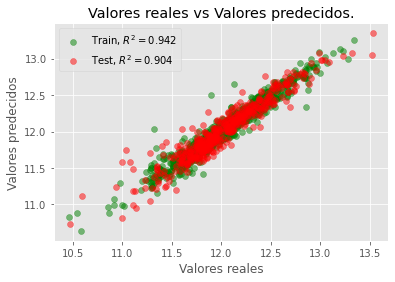

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

data = df_train.copy()
X = data.drop(['SalePrice'], axis=True)
X = pd.get_dummies(X)
#X = data.drop(['SalePrice', 'Id'], axis=True)
y = data['SalePrice']
y = np.log(data['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
id_train, id_test = X_train['Id'], X_test['Id']
X_train, X_test = X_train.drop(['Id'], axis= True),X_test.drop(['Id'], axis= True)


reg = LinearRegression().fit(X_train, y_train)

#y_predict = reg.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_train, reg.predict(X_train), color='green', alpha=0.5,
           label = 'Train, $R^2 = ${:.3f}'.format(reg.score(X_train, y_train)) )
ax.scatter(y_test, reg.predict(X_test), color='red', alpha=0.5,
           label = 'Test, $R^2 = ${:.3f}'.format(reg.score(X_test, y_test)))
ax.set_title('Valores reales vs Valores predecidos.')
ax.set_xlabel('Valores reales')
ax.set_ylabel('Valores predecidos')
ax.legend()

# 0.942 0.905

Hagamos uso de la paqueterías *statsmodel* para verificar los coeficientes obtenidos. 

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


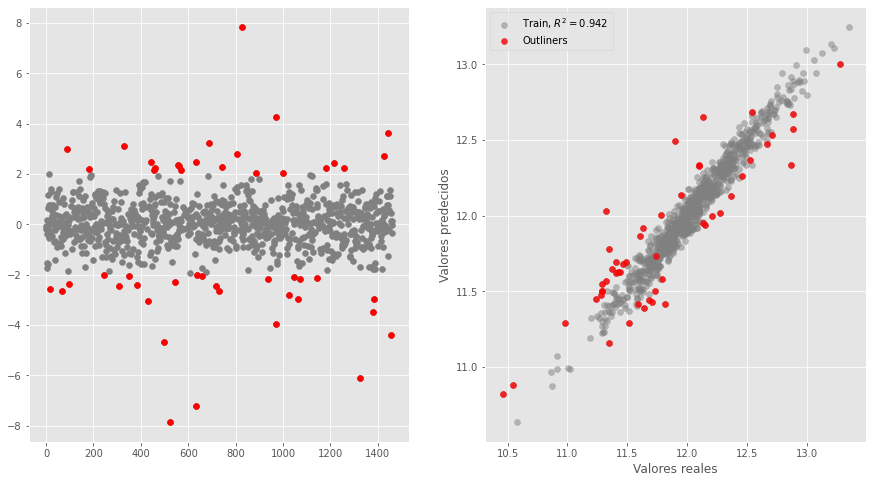

In [199]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")
Y = y_train
X = X_train
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

outliners = OLSInfluence(results)

fig, [ax1,ax2] = plt.subplots(1,2)
fig.set_size_inches([15,8])

ax1.scatter(id_train,outliners.resid_studentized, color = 'gray')

outlines_sample = id_train.copy()[ outliners.resid_studentized.abs() > 2 ] 
ax1.scatter(id_train[ outliners.resid_studentized.abs() > 2 ],
            outliners.resid_studentized[ outliners.resid_studentized.abs() > 2 ], color = 'red')

ax2.scatter(y_train, reg.predict(X_train), color='gray', alpha=0.5,
           label = 'Train, $R^2 = ${:.3f}'.format(reg.score(X_train, y_train)) )
X_sample_outliners = X_train[id_train.isin(outlines_sample)]
y_sample_outliners = y_train[id_train.isin(outlines_sample)]
ax2.scatter(y_sample_outliners, reg.predict(X_sample_outliners), color='red', alpha=0.8,
           label = 'Outliners')
#ax.scatter(y_test, reg.predict(X_test), color='red', alpha=0.5,
#           label = 'Test, $R^2 = ${:.3f}'.format(reg.score(X_test, y_test)))
#ax2.set_title('Valores reales vs Valores predecidos.')
ax2.set_xlabel('Valores reales')
ax2.set_ylabel('Valores predecidos')
ax2.legend()

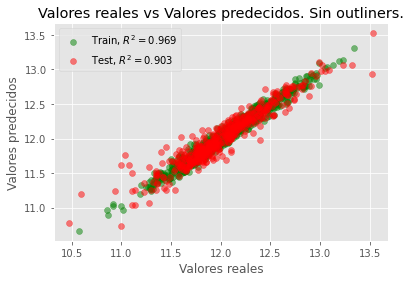

In [200]:
#Volviendo a entrenar pero sin los outliners
array_bool_outliner = id_train.isin(outlines_sample)
X_train = X_train[ ~ array_bool_outliner]
y_train = y_train[ ~ array_bool_outliner]

reg = LinearRegression().fit(X_train, y_train)

#y_predict = reg.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_train, reg.predict(X_train), color='green', alpha=0.5,
           label = 'Train, $R^2 = ${:.3f}'.format(reg.score(X_train, y_train)) )
ax.scatter(y_test, reg.predict(X_test), color='red', alpha=0.5,
           label = 'Test, $R^2 = ${:.3f}'.format(reg.score(X_test, y_test)))
ax.set_title('Valores reales vs Valores predecidos. Sin outliners.')
ax.set_xlabel('Valores reales')
ax.set_ylabel('Valores predecidos')
ax.legend()

# Veamos la comparación la funcionalidad del modelo con la base test.

Text(0.5, 1.0, 'Conteo de datos verdaderos sobre las variables.')

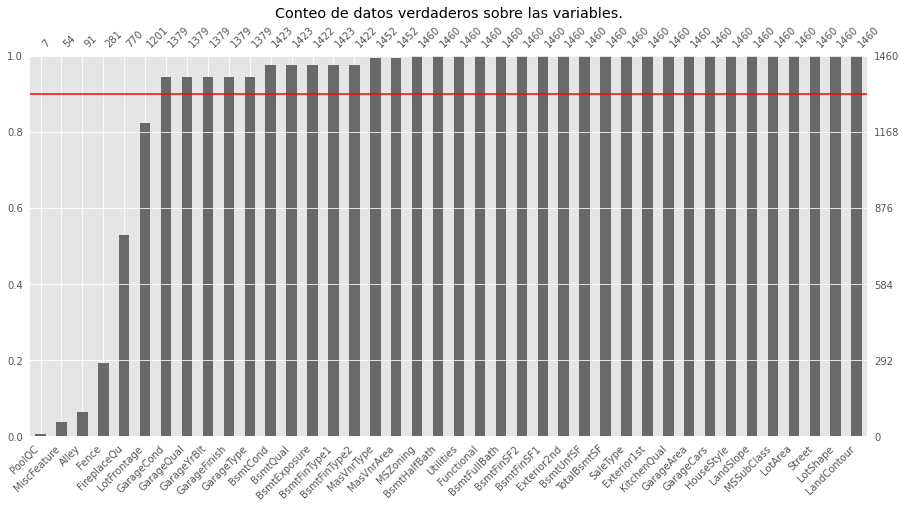

In [201]:
df_data_test = df_test.copy()
array_id = df_data_test['Id']

null_var = list(df_data_test.isna().sum().sort_values(ascending=False).index)[0:40]
#plt.plot(df_test.isna().sum().sort_values(ascending=False))
#df_test.isna().sum().sort_values(ascending=False).head(40)
df_faltantes = df_data[null_var]
#df_train['SalePrice']
fig, ax = plt.subplots()
fig.set_size_inches([15,7])
msno.bar(df_faltantes , ax = ax,fontsize=10)
xleft, xright = ax.set_xlim()
ax.hlines(y=0.90, xmin=xleft,
          xmax = xright, color = 'r')
ax.set_title('Conteo de datos verdaderos sobre las variables.')

In [202]:
column_eliminate = ["PoolQC",
                    "MiscFeature",
                    "Alley",
                    "Fence",
                    "FireplaceQu",
                    "LotFrontage"]

df_columns_int = df_data_test.drop(column_eliminate, axis = 1)
#df_columns_int['SalePrice'] = np.log(df_columns_int['SalePrice'])

#Columnas con algunos datos faltantes
list_null_axes = df_columns_int.isna().sum()[df_columns_int.isna().sum() > 0 ].index
dict_type = df_columns_int.dtypes.to_dict()

columns_objets = [column for column in list_null_axes if str(dict_type[column]) != 'float64' or column == 'GarageYrBlt']
columns_float = [column for column in list_null_axes if str(dict_type[column]) == 'float64' and column != 'GarageYrBlt']

df_complete_data = df_columns_int.copy()

#Para las continuas
imputer = KNNImputer(n_neighbors=5)
df_complete_data[columns_float] = imputer.fit_transform(df_complete_data[columns_float])

#Para las otras
imp = SimpleImputer(strategy="most_frequent")
df_complete_data[columns_objets] = imp.fit_transform(df_complete_data[columns_objets])

df_test_final = df_complete_data.copy()
columns_ponderar = ['ExterQual',
                    'ExterCond',
                    'BsmtQual',
                    'BsmtCond',
                    'BsmtExposure',
                    'BsmtFinType1',
                    'BsmtFinType2',
                    'HeatingQC',
                    'KitchenQual',
                    'GarageFinish',
                    'GarageQual',
                    'GarageCond']

dict_qual = {"Ex":5,
       "Gd":4,
       "TA":3,
       "Fa":2,
       "Po":1,
       "NA":0} 

dict_fin = {"Fin":4,
       "RFn":2,
       "Unf":	1,
       "NA":0} 

dict_exp = {"Gd":4,
       "Av":	3,	
       "Mn" :2,
       "No":	1,
       "NA": 0}

dict_qualtype = {"GLQ":	6,
       "ALQ":5,
       "BLQ":4,
       "Rec":3,
       "LwQ":2,
       "Unf":	1,
       "NA":0}


df_test_final['ExterQual'] = df_test_final['ExterQual'].replace(dict_qual)
df_test_final['ExterCond'] = df_test_final['ExterCond'].replace(dict_qual)
df_test_final['BsmtQual'] = df_test_final['BsmtQual'].replace(dict_qual)
df_test_final['BsmtCond'] = df_test_final['BsmtCond'].replace(dict_qual)
df_test_final['BsmtExposure'] = df_test_final['BsmtExposure'].replace(dict_exp)
df_test_final['BsmtFinType1'] = df_test_final['BsmtFinType1'].replace(dict_qualtype)
df_test_final['BsmtFinType2'] = df_test_final['BsmtFinType2'].replace(dict_qualtype)
df_test_final['HeatingQC'] = df_test_final['HeatingQC'].replace(dict_qual)
df_test_final['KitchenQual'] = df_test_final['KitchenQual'].replace(dict_qual)
df_test_final['GarageFinish'] = df_test_final['GarageFinish'].replace(dict_fin)
df_test_final['GarageQual'] = df_test_final['GarageQual'].replace(dict_qual)
df_test_final['GarageCond'] = df_test_final['GarageCond'].replace(dict_qual)

df_test_final = df_test_final.drop(columns_not_corr, axis= True)
df_test_final['1stFlrSF'] = np.log(df_test_final['1stFlrSF'])
df_test_final['LotArea'] = np.log(df_test_final['LotArea'])
df_test_final['GrLivArea'] = np.log(df_test_final['GrLivArea'])

In [203]:
X_test_final = df_test_final.drop(['Id'], axis=True)

#Verificamos que tengan el mismo orden las columnas 
data = df_train.copy()
X = data.drop(['SalePrice', 'Id'], axis=True)

X_columns = pd.get_dummies(X).columns
X_columns = X_train.columns
X_test_foo_ = pd.get_dummies(X_test_final)
X_test_foo_ = X_test_foo_[list(set(X_columns) & set(X_test_foo_))]
faltantes = ['Heating_Floor', 'Electrical_Mix', 'HouseStyle_2.5Fin', 'RoofMatl_Metal', 
             'Condition2_RRAn', 'Utilities_NoSeWa', 'Condition2_RRAe', 'Exterior2nd_Other', 
             'RoofMatl_Roll', 'RoofMatl_Membran', 'Exterior1st_ImStucc', 'RoofMatl_ClyTile', 
             'Exterior1st_Stone', 'Heating_OthW', 'Condition2_RRNn']
for column_faltante in faltantes:
  X_test_foo_[column_faltante] = 0
X_test_foo_ = X_test_foo_[X_columns]


SalePrice = np.exp(reg.predict(X_test_foo_))
print(SalePrice)

final_df = pd.DataFrame({'Id': array_id,
                         'SalePrice': SalePrice})
final_df.to_csv('finalsub.csv', index = False)

[124965.11315943 159452.09174808 185355.33391297 ... 169582.10321593
 125973.45358556 227151.57419072]


In [204]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f finalsub.csv -m "La final"

100% 33.7k/33.7k [00:01<00:00, 29.5kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques